# Shifted-tilted Tophat at Gaussian interference at waist

Applying shift (x-a) without tilt for shifted tophat.

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, plback as plb, cmath as cm

from mpmath import quadgl
from numpy import pi as pi
import mpmath as mp
import scipy.io

inf=np.inf

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
coef=mat['coeftop'].ravel()

Using simtools mode indexing in Python:

$
m = \frac{(N+1)(N+2)}{2}- (A_{python} + 1)
$

$
\rightarrow A_{python} =  \frac{(N+1)(N+2)}{2} + 1 -m 
$

$
n = A_{python} - \frac{N(N+1)}{2} = N-m
$

$
\rightarrow A_{python} = N-m + - \frac{N(N+1)}{2} 
$

$
N = floor( \frac{\sqrt{8A_{python}+1} - 1}{2} ) = ceil(\frac{\sqrt{9+8A_{python}} - 3}{2} )
$

In [3]:
def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes



#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

In [69]:
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 0.00023067,0)
modes_0 = plb.modes((0,0,1))
modes_2 = plb.modes((2,0,1),(0,0,1))

modes_3 = plb.modes( (0,0,2),(1,0,.5),(2,0,2),(3,0,3),(4,0,1),(5,0,1),(7,0,1),(0,18,1))
modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)
modes18= pl.create_modes_order18(listModesM,listModesN,listModesC,NumberModes)
print(params)
print(plane)



wavelength=1.064e-06
w0=0.00023067
z0=0
Zr=0.15710516963503632
q0=0.15710516963503632j

xmin=-0.002,xmax=0.002,xpoints=300,x step size = 1.3333333333333333e-05
ymin=-0.002,ymax=0.002,ypoints=300,y step size = 1.3333333333333333e-05


In [77]:
a = 100e-6
alpha = 0
z=0
a_2 = a+z*np.sin(alpha)

In [78]:
sc_modes = pl.scatter_case2_first_order(z,params,a,alpha,modes)
#a=a_2

(-0.00025066699134930785+0j)
(-0.00017724828350580043+0j)
(-0.0001535008090463546+0j)
(-0.00014011921015558807+0j)
(-0.00013101651915155326+0j)
(-0.00012399949972462124+0j)
(-0.00011745977078673715+0j)
(-0.0001089400384425885+0j)
(-9.423892477547671e-05+0j)
(-6.848805874401413e-05+0j)
(-3.118137264397202e-05+0j)
(7.106171292988872e-06-0j)
(2.637659965404792e-05-0j)
(1.5249784849080028e-05-0j)
(-9.679906751753348e-06+0j)
(-1.612779668916041e-05+0j)
(1.917456558849381e-06-0j)
(1.330503152457445e-05-0j)
(-0.0003070030325864189+0j)
(-0.0002170829259885973+0j)
(-0.0001879896473168841+0j)
(-0.00017154089037189256+0j)
(-0.00016008266579050284+0j)
(-0.00015025504364818892+0j)
(-0.000138460372418447+0j)
(-0.0001192038586143752+0j)
(-8.63122181877175e-05+0j)
(-3.9181319393446136e-05+0j)
(8.908057147861015e-06-0j)
(3.299940732954292e-05-0j)
(1.9046975172031345e-05-0j)
(-1.2072964888552814e-05+0j)
(-2.0090109208963527e-05+0j)
(2.3859718022456896e-06-0j)
(1.65403247082683e-05-0j)
(-0.00034323824362

In [79]:
pl.show_modes(sc_modes)

n\m [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
0   [(0.0005782135489454484+0j), 0, (0.00040885861556282983+0j), 0, (0.0003540803162272261+0j), 0, (0.000323212982065895+0j), 0, (0.0003022158047268879+0j), 0, (0.0002860296460147838+0j), 0, (0.00027094445327376657+0j), 0, (0.0002512919866755189+0j), 0, (0.00021738092777959212+0j), 0, (0.00015798140510481738+0j), 0, (7.192607227785025e-05+0j), 0, (-1.6391805321537432e-05+0j), 0, (-6.0842902421992335e-05+0j), 0, (-3.51766787113729e-05+0j), 0, (2.2328640904269448e-05+0j), 0, (3.720198862288632e-05+0j), 0, (-4.422997044297867e-06+0j), 0, (-3.069071621773588e-05+0j), 0, 0]
1   [(-6.490805354135432e-11+0j), 0, (-8.166583241088227e-10+0j), 0, (-7.904762309643562e-09+0j), 0, (-5.665967763992066e-08+0j), 0, (-3.095698678118341e-07+0j), 0, (-1.3167703187287388e-06+0j), 0, (-4.407350113095552e-06+0j), 0, (-1.1610495450559084e-05+0j), 0, (-2.37652937329174

In [80]:
f2 = pl.calculate(params,plane,sc_modes,z)
f3 = pl.calculate_case2(params,plane,modes,z,a,alpha)

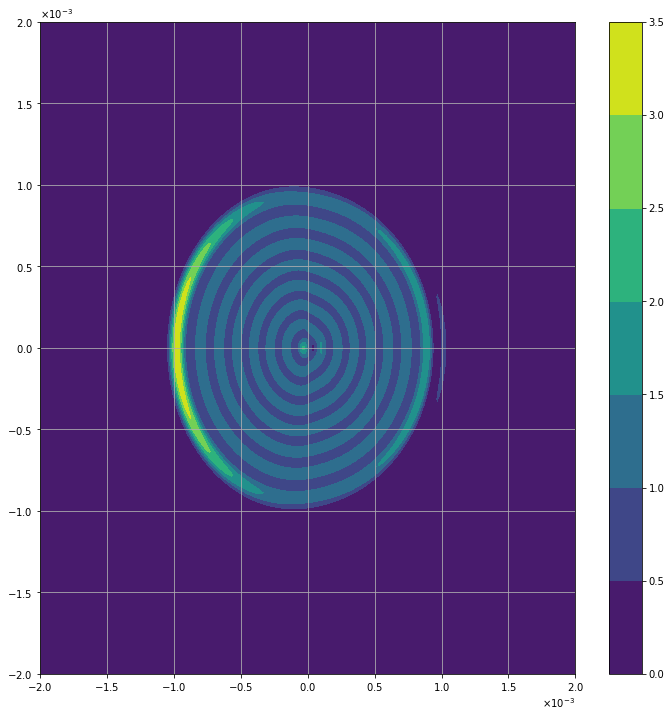

In [81]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

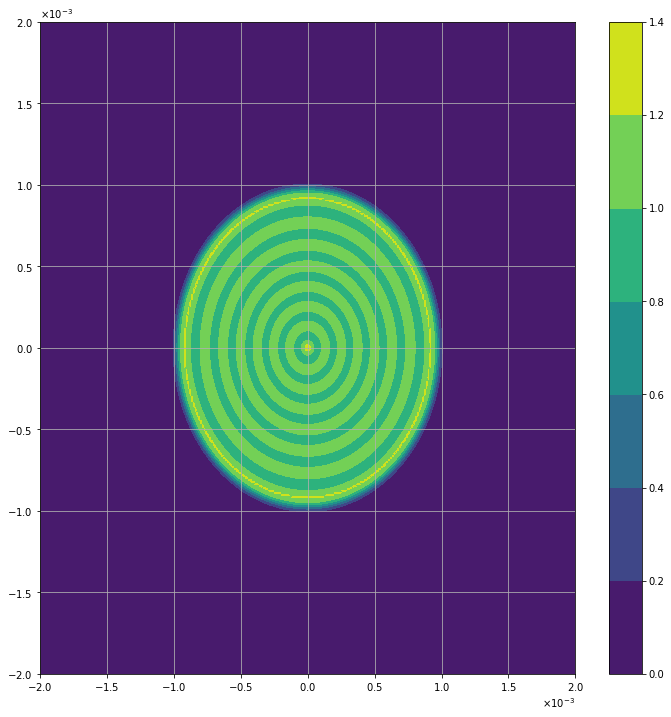

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f3.plane.getX(), f3.plane.getY(), abs(f3.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()